# Siamese Network
Neural network is almost good at every problem but they tend to rely on the need of more data or batter quality data. Problem like face recognition and signature verification, we can't always rely on more data. To solve this problem a new type of neural network is used called Siamese Networks. It only use few numbers of images to get better predictions, it has the ability to learn from very little data.

## What are Siamese Network
Is a class of neural network architecture that contain two or more identical subnetworks. "identical" mean they have same configuration with the same parameters and weight. Parameter updating is mirrored across sub-networks. It is used to find the similarityof the inputs by comapring its features vectors. <br><br>
Traditionally normal NN learns to predict multiple classes, this can be problematic when adding or removing new classes to the adta, in this case we have to update the NN and retrain the whole dataset. Also Deep neural network need large volume of data to train on. SNN (Siamese Neural Network) on the other hand only learn similarity function. Thus we can train it to see of two image are the same. This enables us to classify new classes of data without training the network again.

## Pros and Cons of SNN
**Pros:**
1. More robust to class imbalance, with the aid of one-shot learning, given a few images per class is sufficient for SNN to recognize images in the futures.
2. Nice to an ensemble with the best classifier, given the learning mechanism it is somewhat different from classification, simple averaging of it with a classifier can do much better than average 2 correlated supervised model (e.g. GBM & RF classifier).
3. Learning from semantic similarity, siamese focuses on learning embedding (in the deeper layer) that place the same classes/concepts close together. Hence can learn semantic similarity.
<br><br>

**Cons:**
1. Needs more training time than normal networks, since siamese networks involves quadratic pairs to learn from (to see all information available) it is slower than normal classification type of learning(pointwise learning)
2. Doesn't output probabilities, since training involves pairwise learning, it won't output the probabilities of the predicition but the distance from each class.

## Image Classification Model using Traditional Deep Learning Neural Network Architecture
You first need to obtained labeled dataset containing images of dogs and cats. After training the neural network, and upon gicing any input image the network can only output labels as dog or cat. This is standard computer vision problem known as Image Classification.<br>
In classification, the image is given into the NN and the output layer give the list of probability distribution over all classes (using softmax or other activation function as per the classification problem being solved).<br>
For example i want to classify if this image is cat ot not then for every inpu image we generate two probabilities indicating the probability of the image belonging to each of the 2 classes, but when training we require a lot of images of each class and the model can only predict from the trained labels. <br>
<span style="background-color: #FFFFED">One problem where we might come across is when we want to create employee attendance systems, this the cost of data collection and re-training is high each time a new class is added or a new employee joins</span> <br>

## What is Similarity Learning?
Technique of supervised machine learning in which the goal is make the model learn, which is a similarity function that measures how similar two objects are and returns a similarity value.<br>
- High score is returned when objects are similar.
- Low score is returned when objects are different.

## Use Case of Siamese Network
Most popular use cases of similarity learning are employee attendance and signature varification system. In siamese network, we require only one training example for each class. Due to this name One Shot.
### Employee attendace system
- Let's say I want to create an attendance system for a small organization with 20 employees 
There will be some challenges in this attendance system:
1. The need of different images of each employee.
2. New employee or employee leaving -> re-train again. Basically not scalabel. (Which makes siamese network model great solution)
Insted of classifying a test image to one of the 20 people, the siamese network takes a reference image of the person as input and generates similarity score denoting the probability that the two input images are of the same person. <br> <br>
The similarity score lies from 0-1 (where 0 means no similarity and 1 means full similarity)

## Architecture of SNN
![SNN Architecture](Pict/Siamese_network.png "SNN Architecture") <br> <br>
Containing two or more identical sub-networks, they have the same configuration with the same parameters and wights. Mostly, we only train one if N (the number of subnetworks chosen for solving the problem) the subnetworks and use the same configuration (params and wights) for other sub-networks. SNN used to find the similarity of the inputs by comparing their feature vectors. <br><br>

How does it works? <br>
1. The first subnetworks takes an image (A) as input and passes through convolutional layers and fully connected layers, we get a vector representation of the image.
2. Again the second image (B) through a network that is exactly the same with the same weights and parameters.
3. Now both the encoding can be compared to know how similar they are, if the images are similar then the encoding wil also be quite similar.
4. We will measure the distance between these two vectors and if the distance between these is small then the vectors are similar or the same classes and if the distance is larger then the vectors are different from one another, based on the score.

## Loss Function
Since training SNN involves pairwise learning usual, cross enthropy loss cannot be used in this case, mainly there are two loss functions used in training Siamese networks:
1. Triplet Loss
Where baseline(anchor) is comapred to a positive (thruthy) input and a negative (falsy) input. The distance from baseline input to the positive is minimized and the distance from baseline input to the negative is maximized. During the training process, an image triplet (anchor image, negative image, positive image)(anchor image, negative image, positive image) is fed into the model as a single sample. The idea behind this is that distance between the anchor and positive images should be smaller than that between the anchor and negative images.
2. Contrastive Loss
It is a distance-based loss as opposed to more conventional error-prediction losses. This loss is used to learn embeddings in which two similar points have a low Euclidean distance and two dissimilar points have a large Euclidean distance.

## Training + Testing
- Initialize the siamese network, loss function, optimizer(Adam, Adagrad, SGD etc).
- Pass the images one by one out of the image pairs through the siamese network, as here training involves pairwise learning.
- Calculate the loss using the outputs from the first and second images using the loss.
- Back propogate through the model to calculate the gradients of our model.
- Update the weights using an optimizer to minimize the loss after a certain number of epochs.
- After reaching max epochs we have set for the model and also get the least loss possible.
- Save the model

## Trying Using Siamese

In [2]:
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

In [4]:
import os
# Change directory
os.chdir('/Users/komangandikawirasantosa/AI-Notes/Computer-Vision')
# Verify the current directory
os.getcwd()

'/Users/komangandikawirasantosa/AI-Notes/Computer-Vision'

In [5]:
# Define the base path
BASE_PATH = os.path.join('/Users/komangandikawirasantosa', 'AI-Notes', 'Computer-Vision', 'data')

# Setup paths
POS_PATH = os.path.join(BASE_PATH, 'positive')
NEG_PATH = os.path.join(BASE_PATH, 'negative')
ANC_PATH = os.path.join(BASE_PATH, 'anchor')


In [ ]:
# Make the directories
os.makedirs(POS_PATH, exist_ok=True)
os.makedirs(NEG_PATH, exist_ok=True)
os.makedirs(ANC_PATH, exist_ok=True)

In [15]:
# Uncompress Tar GZ Labelled Faces
!tar -xf /Users/komangandikawirasantosa/AI-Notes/Computer-Vision/lfw.tgz

In [16]:
# Move LFW Images to the following repository data/negative
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        EX_PATH = os.path.join('lfw', directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)

In [6]:
os.listdir('lfw')

['German_Khan',
 'Stefano_Gabbana',
 'Dragan_Covic',
 'Jeff_Hornacek',
 'Sureyya_Ayhan',
 'Deb_Santos',
 'Bob_Newhart',
 'Wang_Hailan',
 'Paul_McNulty',
 'Jimmy_Iovine',
 'Claudia_Pechstein',
 'Ranil_Wickremasinghe',
 'Ben_Chandler',
 'Mark_Komara',
 'Rand_Beers',
 'Joanne_Woodward',
 'John_Bond',
 'Reginald_Hudlin',
 'Lee_Baca',
 'Mary-Kate_Olsen',
 'Emily_Stevens',
 'Xiang_Huaicheng',
 'Phil_Mickelson',
 'Gerry_Kelly',
 'Salma_Hayek',
 'Jim_Edmonds',
 'Martina_McBride',
 'Anthony_Pico',
 'Jose_Theodore',
 'Heidi_Fleiss',
 'Mark_Richt',
 'Mike_Smith',
 'Paul_ONeill',
 'Horace_Newcomb',
 'Mohammad_Fares',
 'JK_Rowling',
 'Shinya_Taniguchi',
 'Tony_Curtis',
 'Laurie_Pirtle',
 'Angel_Maza',
 'Ray_Sherman',
 'Nancy_Powell',
 'Kathryn_Tucker',
 'Gro_Harlem_Brundtland',
 'Jacqueline_Marris',
 'Mikhail_Gorbachev',
 'Takuma_Sato',
 'Ray_Lewis',
 'Hank_Aaron',
 'Chip_Knight',
 'Tracee_Treadwell',
 'Ronald_Young_Jr',
 'Gustavo_Cisneros',
 'Jack_Osbourne',
 'Isidro_Pastor',
 'Mike_Duke',
 'Natal

In [7]:
!ls

Computer-Vision.md      Pict                    lfw
Face-Detection.ipynb    Siamese-Network.ipynb   lfw.tgz
Image-Representation.md data                    training_checkpoints


In [8]:
# Import uuid library to generate unique image names
import uuid

In [9]:
os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))

'/Users/komangandikawirasantosa/AI-Notes/Computer-Vision/data/anchor/9ceeb1aa-95a0-11ef-aa77-6ab63be3cfbf.jpg'

In [16]:
# Establish a connection to the webcam
cap = cv2.VideoCapture(1)
while cap.isOpened(): 
    ret, frame = cap.read()
   
    # Cut down frame to 250x250px
    frame = frame[120:120+250,200:200+250, :]
    
    # Collect anchors 
    if cv2.waitKey(1) & 0XFF == ord('a'):
        # Create the unique file path 
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out anchor image
        cv2.imwrite(imgname, frame)
    
    # Collect positives
    if cv2.waitKey(1) & 0XFF == ord('p'):
        # Create the unique file path 
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out positive image
        cv2.imwrite(imgname, frame)
    
    # Show image back to screen
    cv2.imshow('Image Collection', frame)
    
    # Breaking gracefully
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
        
# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()

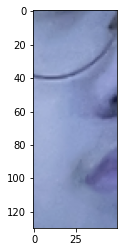

In [18]:
plt.imshow(frame[120:120+250,200:200+250, :])

## Preprocessing

In [10]:
anchor = tf.data.Dataset.list_files(ANC_PATH+'/*.jpg').take(100)
positive = tf.data.Dataset.list_files(POS_PATH+'/*.jpg').take(100)
negative = tf.data.Dataset.list_files(NEG_PATH+'/*.jpg').take(100)

In [11]:
dir_test = anchor.as_numpy_iterator()

In [12]:
dir_test.next()

b'/Users/komangandikawirasantosa/AI-Notes/Computer-Vision/data/anchor/a547c49c-9288-11ef-b150-6ab63be3cfbf.jpg'

In [13]:
def preprocess(file_path):
    
    # Read in image from file path
    byte_img = tf.io.read_file(file_path)
    # Load in the image 
    img = tf.io.decode_jpeg(byte_img)
    
    # Preprocessing steps - resizing the image to be 100x100x3
    img = tf.image.resize(img, (100,100))
    # Scale image to be between 0 and 1 
    img = img / 255.0

    # Return image
    return img

In [14]:
img = preprocess('data/anchor/a1fe56a8-94da-11ef-b71a-6ab63be3cfbf.jpg')

In [15]:
img

<tf.Tensor: shape=(100, 100, 3), dtype=float32, numpy=
array([[[0.09656863, 0.07696079, 0.10441177],
        [0.08137255, 0.06960785, 0.09705883],
        [0.08210784, 0.07034314, 0.09779412],
        ...,
        [0.65686274, 0.61764705, 0.6098039 ],
        [0.657598  , 0.6242647 , 0.6134804 ],
        [0.6605392 , 0.62916666, 0.61740196]],

       [[0.09068628, 0.07990196, 0.10539216],
        [0.07303922, 0.0622549 , 0.0877451 ],
        [0.07892157, 0.06813726, 0.09362745],
        ...,
        [0.6517157 , 0.6159314 , 0.60637254],
        [0.6497549 , 0.61838233, 0.6066176 ],
        [0.6507353 , 0.6193628 , 0.60759807]],

       [[0.06617647, 0.05833333, 0.07794118],
        [0.07254902, 0.06470589, 0.08431373],
        [0.06691176, 0.05906863, 0.07867647],
        ...,
        [0.65392154, 0.622549  , 0.6107843 ],
        [0.654902  , 0.62352943, 0.6117647 ],
        [0.6509804 , 0.61960787, 0.60784316]],

       ...,

       [[0.76617646, 0.7132353 , 0.6612745 ],
        [0.74

In [16]:
img.numpy().max()

1.0

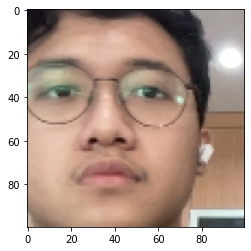

In [17]:
plt.imshow(img)

In [18]:
## Label Dataset
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [19]:
samples = data.as_numpy_iterator()

In [20]:
exampple = samples.next()

In [21]:
exampple

(b'/Users/komangandikawirasantosa/AI-Notes/Computer-Vision/data/anchor/11d4055a-94f8-11ef-b71a-6ab63be3cfbf.jpg',
 b'/Users/komangandikawirasantosa/AI-Notes/Computer-Vision/data/positive/b79a411a-9288-11ef-b150-6ab63be3cfbf.jpg',
 1.0)

In [22]:
## yeah
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [34]:
res = preprocess_twin(*exampple)

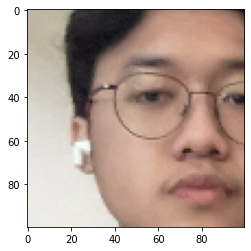

In [35]:
plt.imshow(res[1])

In [36]:
res[2]

1.0

In [23]:
# Build dataloader pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=10000)

In [24]:
samples = data.as_numpy_iterator()

In [25]:
len(samples.next())

3

In [26]:
samp = samples.next()

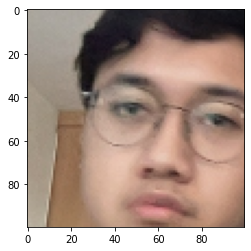

In [52]:
plt.imshow(samp[0])

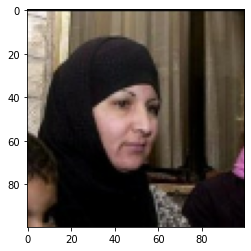

In [53]:
plt.imshow(samp[1])

In [54]:
# No match picture from anchor to negative
samp[2]

0.0

In [55]:
samp = samples.next()

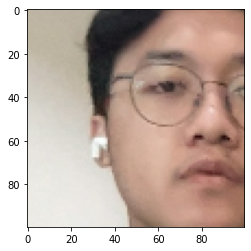

In [56]:
plt.imshow(samp[0])

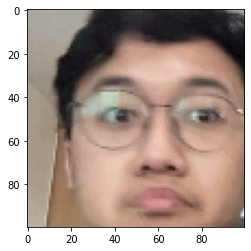

In [57]:
plt.imshow(samp[1])

In [58]:
# Example if its match (anchor with positive)
samp[2]

1.0

In [27]:
# Training partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [28]:
# Testing partition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

## Creating Embedding Layer

In [29]:
inp = Input(shape=(100,100,3), name='input_image')

In [30]:
c1 = Conv2D(64, (10,10), activation='relu')(inp)

In [31]:
m1 = MaxPooling2D(64, (2,2), padding='same')(c1)

In [32]:
c2 = Conv2D(128, (7,7), activation='relu')(m1)
m2 = MaxPooling2D(64, (2,2), padding='same')(c2)

In [33]:
c3 = Conv2D(128, (4,4), activation='relu')(m2)
m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

In [34]:
c4 = Conv2D(256, (4,4), activation='relu')(m3)
f1 = Flatten()(c4)
d1 = Dense(4096, activation='sigmoid')(f1)

In [35]:
mod = Model(inputs=[inp], outputs=[d1], name='embedding')

In [36]:
mod.summary()

Model: "embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)        │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 91, 91, 64)     │        19,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 46, 46, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 40, 40, 128)    │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 17, 17, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 256)      │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    37,752,832 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,960,448 (148.62 MB)

 Trainable params: 38,960,448 (148.62 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
def make_embedding(): 
    inp = Input(shape=(100,100,3), name='input_image')
    
    # First block
    c1 = Conv2D(64, (10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)
    
    # Second block
    c2 = Conv2D(128, (7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
    
    # Third block 
    c3 = Conv2D(128, (4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)
    
    # Final embedding block
    c4 = Conv2D(256, (4,4), activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)
    
    
    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [38]:
embedding = make_embedding()

In [39]:
embedding.summary()

Model: "embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)        │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 91, 91, 64)     │        19,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 46, 46, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 40, 40, 128)    │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 17, 17, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 6, 6, 256)      │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    37,752,832 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,960,448 (148.62 MB)

 Trainable params: 38,960,448 (148.62 MB)

 Non-trainable params: 0 (0.00 B)

## Distance Layer

In [110]:
## Unsuable
class L1Dist(Layer):
    def __init__(self, **kwargs):
        super(L1Dist, self).__init__(**kwargs)

    def call(self, input_embedding, validation_embedding):
        # Ensure the inputs are tensors and perform subtraction
        return tf.math.abs(input_embedding - validation_embedding)

    def compute_output_shape(self, input_shape):
        # Ensure the layer knows how to calculate the output shape
        return input_shape[0]

In [104]:
class L1Dist(tf.keras.layers.Layer):
    def __init__(self):
        super(L1Dist, self).__init__()

    def call(self, input_embedding, validation_embedding):
        # Ensure the inputs are tensors and perform subtraction
        input_embedding = tf.convert_to_tensor(input_embedding[0])  # Unpack the first tensor from the list
        validation_embedding = tf.convert_to_tensor(validation_embedding[0])  # Unpack the first tensor from the list
        return tf.math.abs(input_embedding - validation_embedding)


In [105]:
l1 = L1Dist()

In [ ]:
#l1(anchor_embedding, validation_embedding)

## Siamese Model

In [42]:
input_image = Input(name='input_img', shape=(100,100,3))
validation_image = Input(name='validation_img', shape=(100,100,3))

In [43]:
inp_embedding = embedding(input_image)
val_embedding = embedding(validation_image)

In [44]:
siamese_layer = L1Dist()

In [45]:
distances = siamese_layer(inp_embedding, val_embedding)

In [46]:
classifier = Dense(1, activation='sigmoid')(distances)

In [47]:
classifier

<KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_21>

In [48]:
siamese_network = Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [49]:
siamese_network.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ validation_img      │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 4096)      │ 38,960,448 │ input_img[0][0],  │
│ (Functional)        │                   │            │ validation_img[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ l1_dist_1 (L1Dist)  │ (None, 4096)      │          0 │ embedding[0][0],  │
│                     │                   │            │ embedding[1][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │      4,097 │ l1_dist_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 38,964,545 (148.64 MB)

 Trainable params: 38,964,545 (148.64 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
def make_siamese_model(): 
    
    # Anchor image input in the network
    input_image = Input(name='input_img', shape=(100,100,3))
    
    # Validation image in the network 
    validation_image = Input(name='validation_img', shape=(100,100,3))
    
    # Combine siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    
    # Classification layer 
    classifier = Dense(1, activation='sigmoid')(distances)
    
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [51]:
siamese_model = make_siamese_model()

In [52]:
siamese_model.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ validation_img      │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 4096)      │ 38,960,448 │ input_img[0][0],  │
│ (Functional)        │                   │            │ validation_img[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ l1_dist_2 (L1Dist)  │ (None, 4096)      │          0 │ embedding[2][0],  │
│                     │                   │            │ embedding[3][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │      4,097 │ l1_dist_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 38,964,545 (148.64 MB)

 Trainable params: 38,964,545 (148.64 MB)

 Non-trainable params: 0 (0.00 B)

## TRAINING

In [53]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [54]:
opt = tf.keras.optimizers.Adam(1e-4) # 0.0001

In [55]:
# Checkpoints
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

![Note](Pict/SIdenote.png "Note")

In [56]:
# Train step Function
test_batch = train_data.as_numpy_iterator()

In [57]:
batch_1 = test_batch.next()

In [58]:
X = batch_1[:2]

In [59]:
y = batch_1[2]

In [60]:
y

array([0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1.],
      dtype=float32)

In [61]:
@tf.function
def train_step(batch):
    
    # Record all of our operations 
    with tf.GradientTape() as tape:     
        # Get anchor and positive/negative image
        X = batch[:2]
        # Get label
        y = batch[2]
        
        # Forward pass
        yhat = siamese_model(X, training=True)
        # Calculate loss
        loss = binary_cross_loss(y, yhat)
    print(loss)
        
    # Calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    # Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
        
    # Return loss
    return loss

In [62]:
## Training Loop
from tensorflow.keras.metrics import Precision, Recall

In [63]:
def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        
        # Creating a metric object 
        r = Recall()
        p = Precision()
        
        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here
            loss = train_step(batch)
            yhat = siamese_model.predict(batch[:2])
            r.update_state(batch[2], yhat)
            p.update_state(batch[2], yhat) 
            progbar.update(idx+1)
        print(loss.numpy(), r.result().numpy(), p.result().numpy())
        
        # Save checkpoints
        if epoch % 10 == 0: 
            checkpoint.save(file_prefix=checkpoint_prefix)

## Training the Model

In [64]:
EPOCHS = 50

In [65]:
train(train_data, EPOCHS)


 Epoch 1/50
Tensor("binary_crossentropy/truediv:0", shape=(), dtype=float32)


/Users/komangandikawirasantosa/opt/anaconda3/lib/python3.9/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['input_img', 'validation_img']. Received: the structure of inputs=('*', '*')
  warnings.warn(
/Users/komangandikawirasantosa/opt/anaconda3/lib/python3.9/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['input_image']. Received: the structure of inputs=*
  warnings.warn(


Tensor("binary_crossentropy/truediv:0", shape=(), dtype=float32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/stepte
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/stepep
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/stepp
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
8/9 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step Tensor("binary_crossentropy/truediv:0", shape=(), dtype=float32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 76s 8s/step
0.34213433 0.17142858 1.0

 Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/stepe
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/stepp
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 74s 8s/step
0.45628023 0.34246576 1.0

 Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s

## Evaluation

In [66]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

In [87]:
# Get a batch of test data
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [88]:
y_hat = siamese_model.predict([test_input, test_val])

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [89]:
# Post processing the results 
[1 if prediction > 0.5 else 0 for prediction in y_hat ]

[1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1]

In [90]:
y_true

array([1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.],
      dtype=float32)

In [91]:
# Creating a metric object 
m = Recall()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

In [92]:
# Creating a metric object 
m = Precision()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

In [93]:
r = Recall()
p = Precision()

for test_input, test_val, y_true in test_data.as_numpy_iterator():
    yhat = siamese_model.predict([test_input, test_val])
    r.update_state(y_true, yhat)
    p.update_state(y_true,yhat) 

print(r.result().numpy(), p.result().numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1.0 1.0


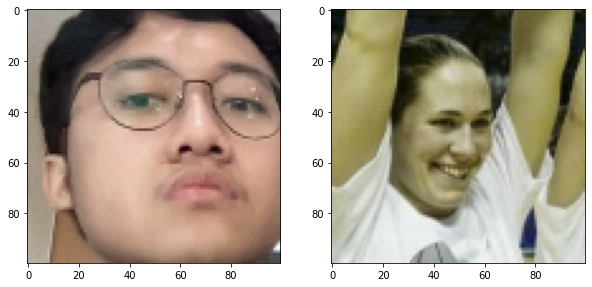

In [102]:
# Set plot size 
plt.figure(figsize=(10,8))

# Set first subplot
plt.subplot(1,2,1)
plt.imshow(test_input[5])

# Set second subplot
plt.subplot(1,2,2)
plt.imshow(test_val[5])

# Renders cleanly
plt.show()

## Saving Models

In [101]:
# Save weights
siamese_model.save('siamesemodelv2.h5')

In [115]:
import tensorflow as tf

class L1Dist(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(L1Dist, self).__init__(**kwargs)

    def call(self, input_embedding, validation_embedding):
        # Ensure the inputs are tensors
        input_embedding = tf.convert_to_tensor(input_embedding)
        validation_embedding = tf.convert_to_tensor(validation_embedding)
        
        # Perform absolute difference
        return tf.math.abs(input_embedding - validation_embedding)


In [116]:
siamese_model = tf.keras.models.load_model(
    'siamesemodelv2.h5', 
    custom_objects={'L1Dist': L1Dist},
    compile=False
)


In [117]:
# Make predictions with reloaded model
siamese_model.predict([test_input, test_val])

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[[9.9999541e-01],
        [9.9985224e-01],
        [9.9999684e-01],
        [9.9985373e-01],
        [1.1999234e-09],
        [2.5863296e-04],
        [5.5815217e-11],
        [9.9965131e-01],
        [6.3154028e-13],
        [9.9995774e-01],
        [1.6379174e-05],
        [1.0000000e+00]]], dtype=float32)

In [118]:
# View model summary
siamese_model.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ validation_img      │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 4096)      │ 38,960,448 │ input_img[0][0],  │
│ (Functional)        │                   │            │ validation_img[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ l1_dist_8 (L1Dist)  │ (1, None, 4096)   │          0 │ embedding[0][0],  │
│                     │                   │            │ embedding[1][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (1, None, 1)      │      4,097 │ l1_dist_8[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 38,964,545 (148.64 MB)

 Trainable params: 38,964,545 (148.64 MB)

 Non-trainable params: 0 (0.00 B)

## Real Time Predictions

In [124]:
os.listdir(os.path.join('application_data', 'verification_images'))

['214e51ca-94f8-11ef-b71a-6ab63be3cfbf.jpg',
 '2d6660c4-94f8-11ef-b71a-6ab63be3cfbf.jpg',
 'd1dcb3d8-94da-11ef-b71a-6ab63be3cfbf.jpg',
 '293ad6a6-94f8-11ef-b71a-6ab63be3cfbf.jpg',
 '201d2e5c-94f8-11ef-b71a-6ab63be3cfbf.jpg',
 '.DS_Store',
 'b79a411a-9288-11ef-b150-6ab63be3cfbf.jpg',
 'c50377e6-94da-11ef-b71a-6ab63be3cfbf.jpg',
 '2232f456-94f8-11ef-b71a-6ab63be3cfbf.jpg',
 '204fe464-94f8-11ef-b71a-6ab63be3cfbf.jpg',
 'c4b73458-94da-11ef-b71a-6ab63be3cfbf.jpg',
 '2a061adc-94f8-11ef-b71a-6ab63be3cfbf.jpg',
 '1fea5c48-94f8-11ef-b71a-6ab63be3cfbf.jpg',
 'd1112d4e-94da-11ef-b71a-6ab63be3cfbf.jpg',
 '29d3629a-94f8-11ef-b71a-6ab63be3cfbf.jpg',
 '2265ec6c-94f8-11ef-b71a-6ab63be3cfbf.jpg',
 '174bd5a8-94f8-11ef-b71a-6ab63be3cfbf.jpg',
 '22199114-94f8-11ef-b71a-6ab63be3cfbf.jpg',
 '2082d324-94f8-11ef-b71a-6ab63be3cfbf.jpg',
 '1eebe64a-94f8-11ef-b71a-6ab63be3cfbf.jpg',
 '211b1c56-94f8-11ef-b71a-6ab63be3cfbf.jpg',
 'd2bb124e-9288-11ef-b150-6ab63be3cfbf.jpg',
 'd1efcba2-9288-11ef-b150-6ab63be3cfbf.jp

In [125]:
os.path.join('application_data', 'input_image', 'input_image.jpg')

'application_data/input_image/input_image.jpg'

In [126]:
for image in os.listdir(os.path.join('application_data', 'verification_images')):
    validation_img = os.path.join('application_data', 'verification_images', image)
    print(validation_img)

application_data/verification_images/214e51ca-94f8-11ef-b71a-6ab63be3cfbf.jpg
application_data/verification_images/2d6660c4-94f8-11ef-b71a-6ab63be3cfbf.jpg
application_data/verification_images/d1dcb3d8-94da-11ef-b71a-6ab63be3cfbf.jpg
application_data/verification_images/293ad6a6-94f8-11ef-b71a-6ab63be3cfbf.jpg
application_data/verification_images/201d2e5c-94f8-11ef-b71a-6ab63be3cfbf.jpg
application_data/verification_images/.DS_Store
application_data/verification_images/b79a411a-9288-11ef-b150-6ab63be3cfbf.jpg
application_data/verification_images/c50377e6-94da-11ef-b71a-6ab63be3cfbf.jpg
application_data/verification_images/2232f456-94f8-11ef-b71a-6ab63be3cfbf.jpg
application_data/verification_images/204fe464-94f8-11ef-b71a-6ab63be3cfbf.jpg
application_data/verification_images/c4b73458-94da-11ef-b71a-6ab63be3cfbf.jpg
application_data/verification_images/2a061adc-94f8-11ef-b71a-6ab63be3cfbf.jpg
application_data/verification_images/1fea5c48-94f8-11ef-b71a-6ab63be3cfbf.jpg
application_data/

In [127]:
def verify(model, detection_threshold, verification_threshold):
    # Build results array
    results = []
    for image in os.listdir(os.path.join('application_data', 'verification_images')):
        input_img = preprocess(os.path.join('application_data', 'input_image', 'input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data', 'verification_images', image))
        
        # Make Predictions 
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)
    
    # Detection Threshold: Metric above which a prediciton is considered positive 
    detection = np.sum(np.array(results) > detection_threshold)
    
    # Verification Threshold: Proportion of positive predictions / total positive samples 
    verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images'))) 
    verified = verification > verification_threshold
    
    return results, verified

In [131]:
import time

In [138]:
# Trying Using PNG
def preprocess(file_path):
    
    # Read in image from file path
    byte_img = tf.io.read_file(file_path)
    # Load in the image 
    img = tf.io.decode_png(byte_img)  # Use decode_png instead of decode_jpeg

    
    # Preprocessing steps - resizing the image to be 100x100x3
    img = tf.image.resize(img, (100,100))
    # Scale image to be between 0 and 1 
    img = img / 255.0

    # Return image
    return img

In [139]:
cap = cv2.VideoCapture(1)
while cap.isOpened():
    ret, frame = cap.read()
    frame = frame[120:120+250,200:200+250, :]
    
    cv2.imshow('Verification', frame)
    
    # Verification trigger
    if cv2.waitKey(10) & 0xFF == ord('v'):
        # Save input image to application_data/input_image folder 
        #hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        #h, s, v = cv2.split(hsv)

        #lim = 255 - 10
        #v[v > lim] = 255
        #v[v <= lim] -= 10
        
        #final_hsv = cv2.merge((h, s, v))
        #img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)

        file_path = os.path.join('application_data', 'input_image', 'input_image.png')
        cv2.imwrite(file_path, frame)
        time.sleep(0.5)
        test_image = cv2.imread(file_path)
        if test_image is None:
            print("Image failed to load, check file format or path.")
        else:
             print("Image loaded successfully.")
        # Run verification
        results, verified = verify(siamese_model, 0.5, 0.5)
        print(verified)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

Image loaded successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


InvalidArgumentError: {{function_node __wrapped__DecodePng_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodePng] name: 

In [140]:
cap.release()
cv2.destroyAllWindows()

## Source
- [A Comprehensive Guide to Siamese Neural Networks by Rinki Nag](https://medium.com/@rinkinag24/a-comprehensive-guide-to-siamese-neural-networks-3358658c0513)
- [A friendly introduction to Siamese Networks by Sean Benhur](https://towardsdatascience.com/a-friendly-introduction-to-siamese-networks-85ab17522942)
- [Build a Python Facial Recognition App with Tensorflow and Kivy by Nicholas Renotte on YouTube](https://www.youtube.com/watch?v=LKispFFQ5GU)

tanks 4 readin dis <3